In [178]:
import pickle
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
with open("feature_spotify_15seg.pkl", "rb") as file:
    track_ids = pickle.load(file)
    features = pickle.load(file)

In [ ]:
#este bloque es para hacerlo nomas para x canciones
#track_ids = track_ids[:110]
#features = features[:110]

In [ ]:
# test
print(len(track_ids))
print(len(features))
print(len(features[0]))
print(len(features[0][0]))

print(features[0].shape)

110
110
20
646
(20, 646)


In [182]:
# Divido en 20 matrices de forma (canciones, 646) para no perder informacion
features = np.array(features)
features_split = [features[:, i, :] for i in range(features.shape[1])]

for i, matrix in enumerate(features_split):
    print(f"Dimensiones de la matriz {i+1}: {matrix.shape}")

Dimensiones de la matriz 1: (110, 646)
Dimensiones de la matriz 2: (110, 646)
Dimensiones de la matriz 3: (110, 646)
Dimensiones de la matriz 4: (110, 646)
Dimensiones de la matriz 5: (110, 646)
Dimensiones de la matriz 6: (110, 646)
Dimensiones de la matriz 7: (110, 646)
Dimensiones de la matriz 8: (110, 646)
Dimensiones de la matriz 9: (110, 646)
Dimensiones de la matriz 10: (110, 646)
Dimensiones de la matriz 11: (110, 646)
Dimensiones de la matriz 12: (110, 646)
Dimensiones de la matriz 13: (110, 646)
Dimensiones de la matriz 14: (110, 646)
Dimensiones de la matriz 15: (110, 646)
Dimensiones de la matriz 16: (110, 646)
Dimensiones de la matriz 17: (110, 646)
Dimensiones de la matriz 18: (110, 646)
Dimensiones de la matriz 19: (110, 646)
Dimensiones de la matriz 20: (110, 646)


Número de componentes para el 90% de la varianza: 48


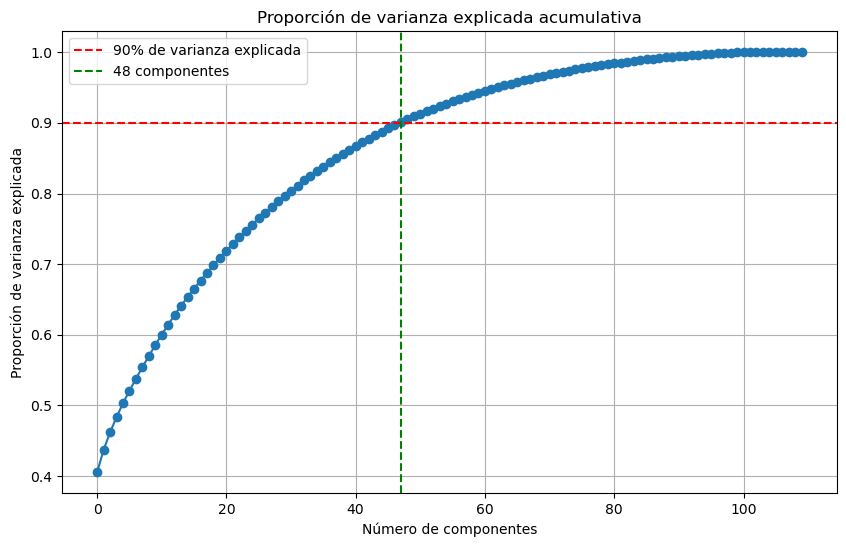

Número de componentes para el 90% de la varianza: 51


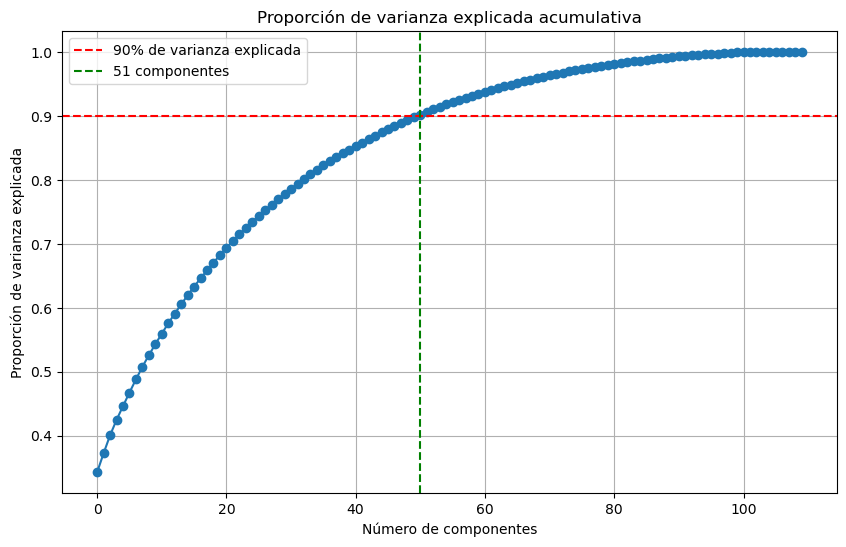

Número de componentes para el 90% de la varianza: 49


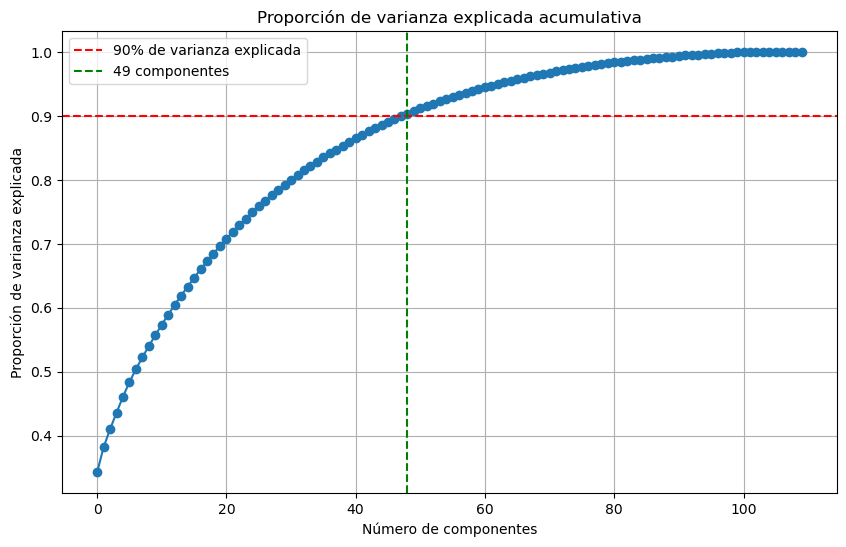

Número de componentes para el 90% de la varianza: 49


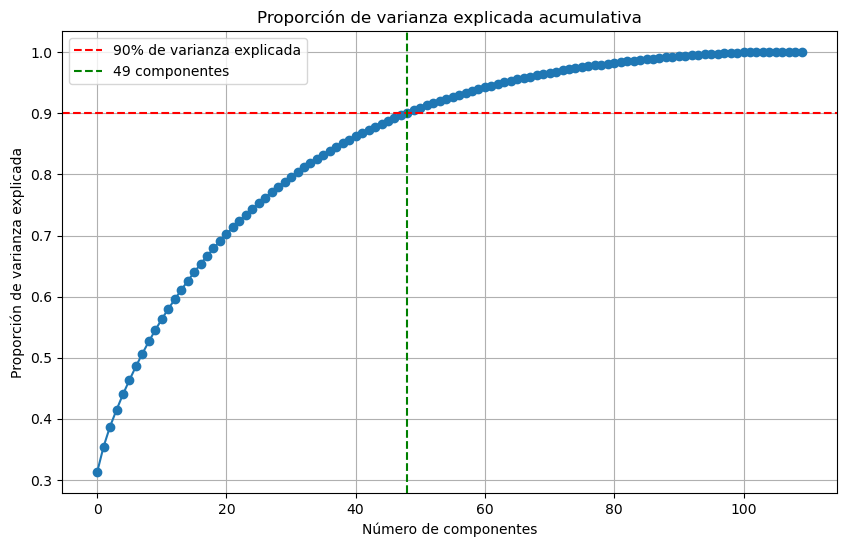

Número de componentes para el 90% de la varianza: 50


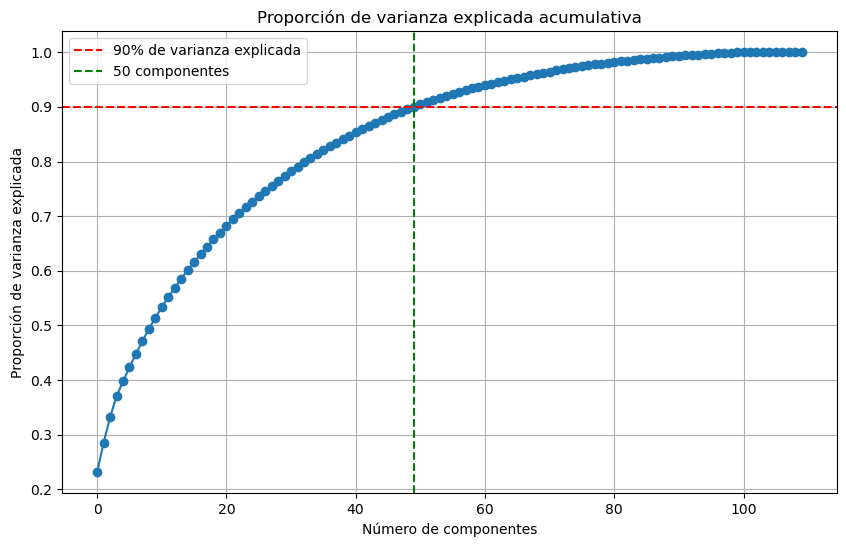

Número de componentes para el 90% de la varianza: 52


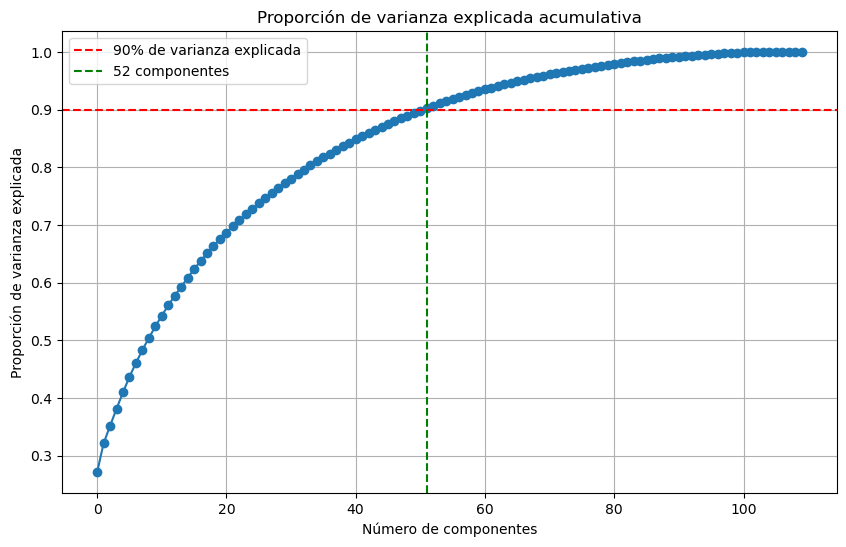

Número de componentes para el 90% de la varianza: 53


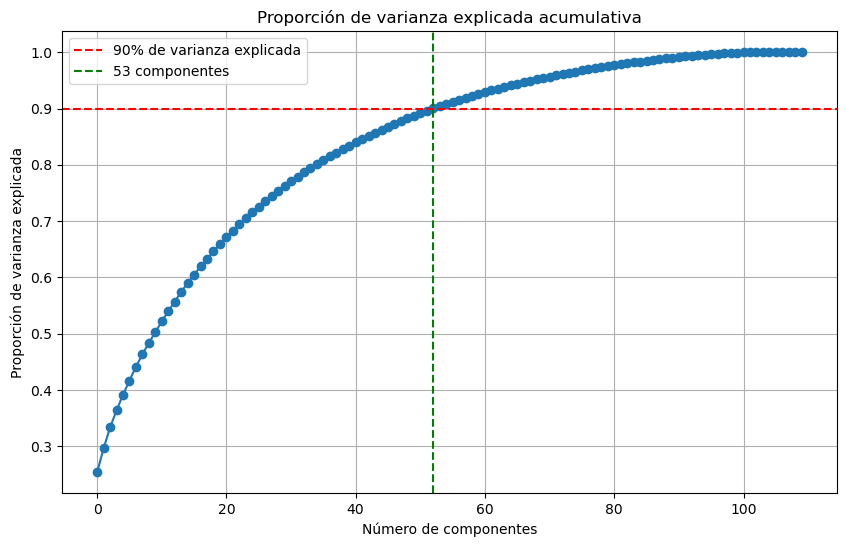

Número de componentes para el 90% de la varianza: 53


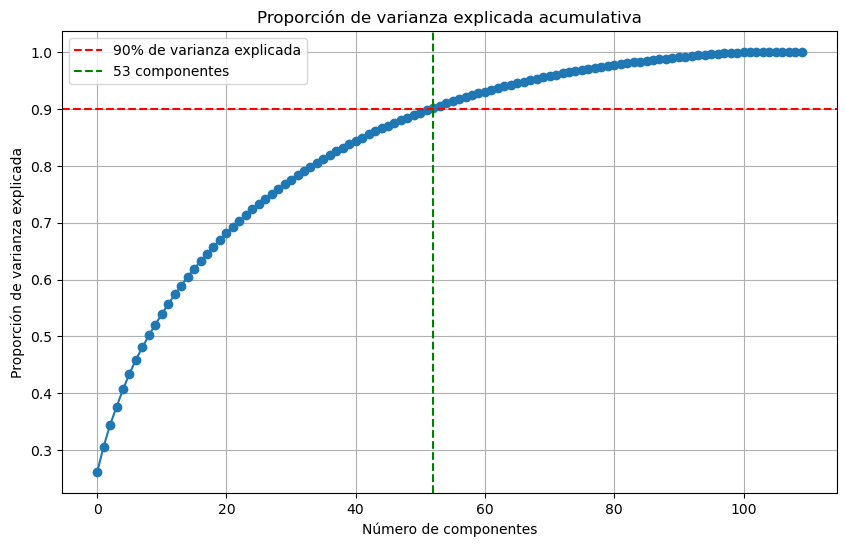

Número de componentes para el 90% de la varianza: 54


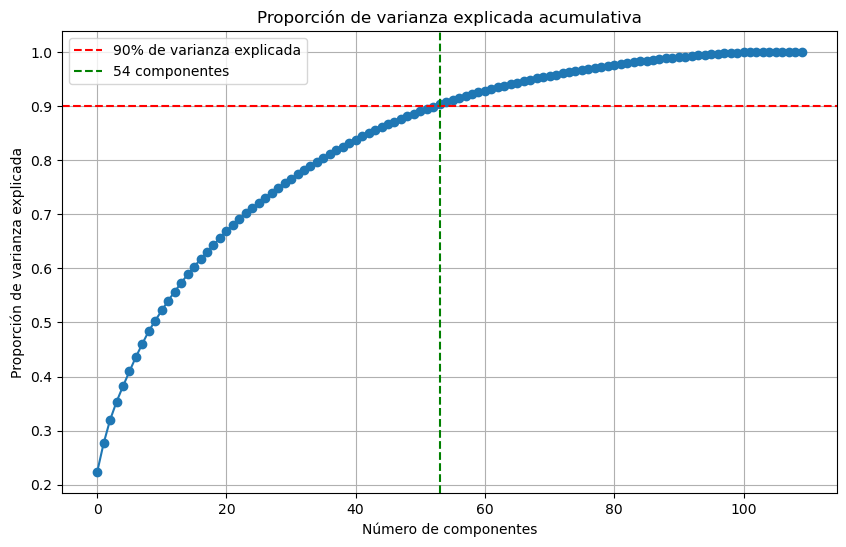

Número de componentes para el 90% de la varianza: 54


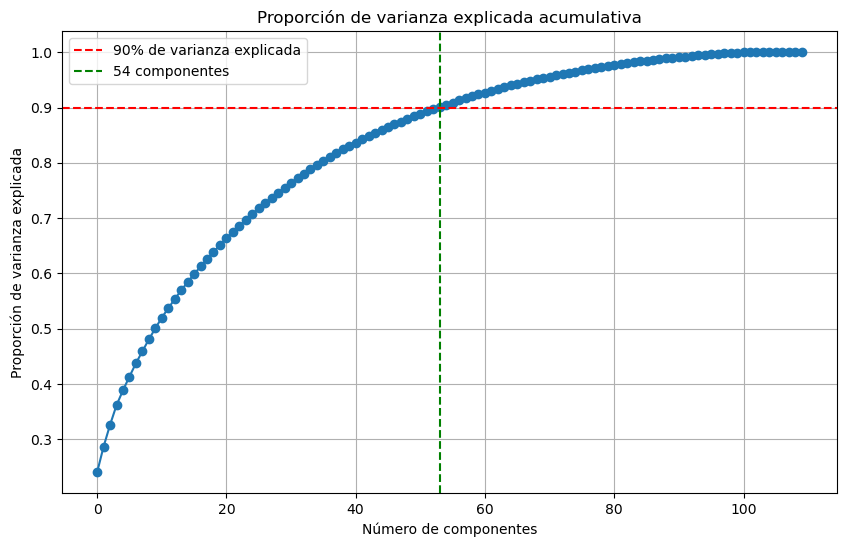

Número de componentes para el 90% de la varianza: 53


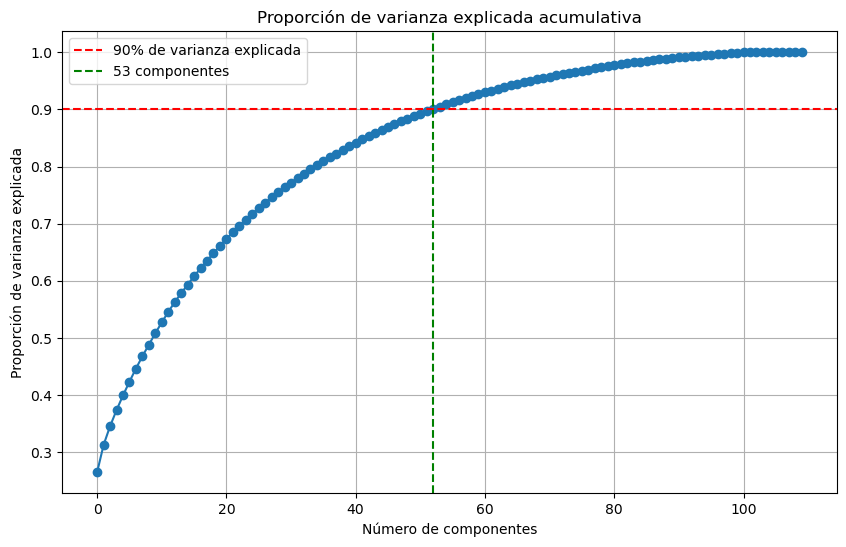

Número de componentes para el 90% de la varianza: 55


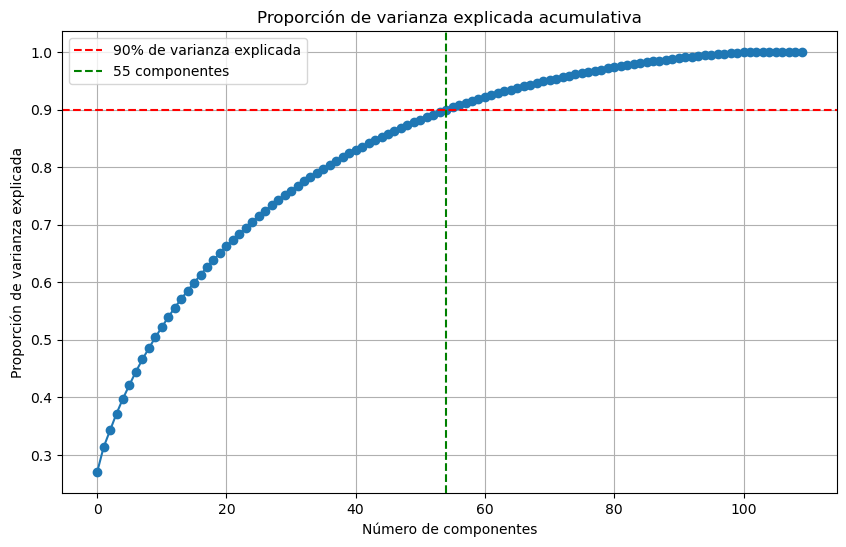

Número de componentes para el 90% de la varianza: 55


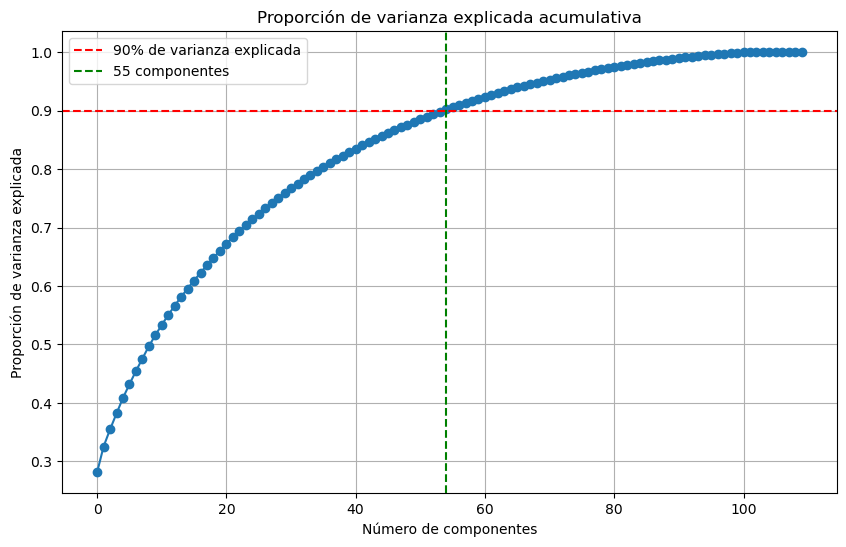

Número de componentes para el 90% de la varianza: 58


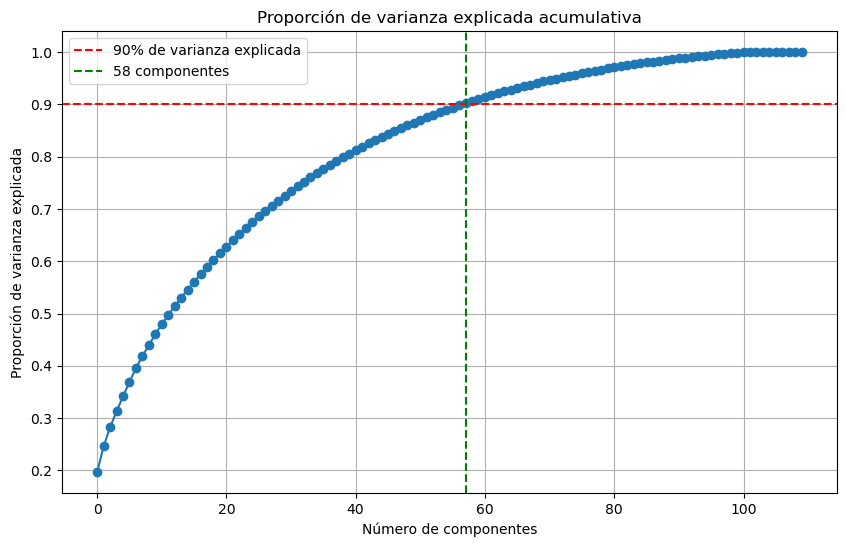

Número de componentes para el 90% de la varianza: 58


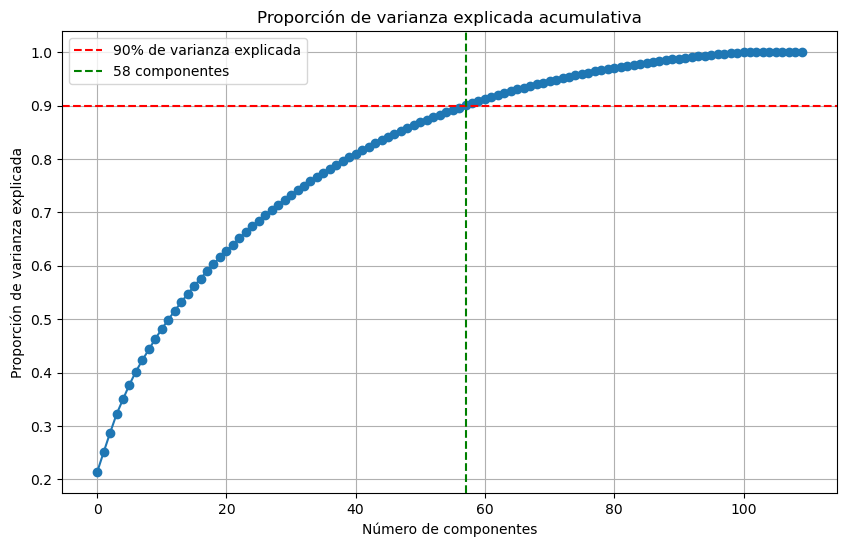

Número de componentes para el 90% de la varianza: 58


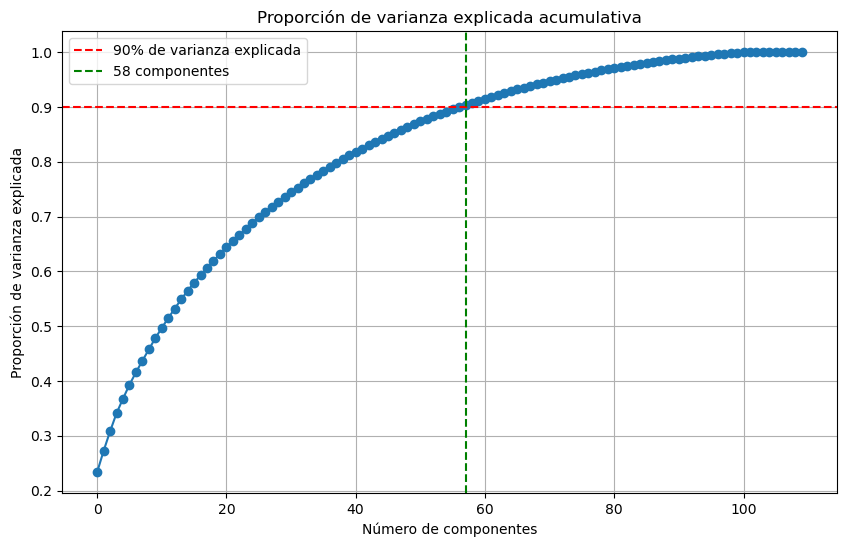

Número de componentes para el 90% de la varianza: 59


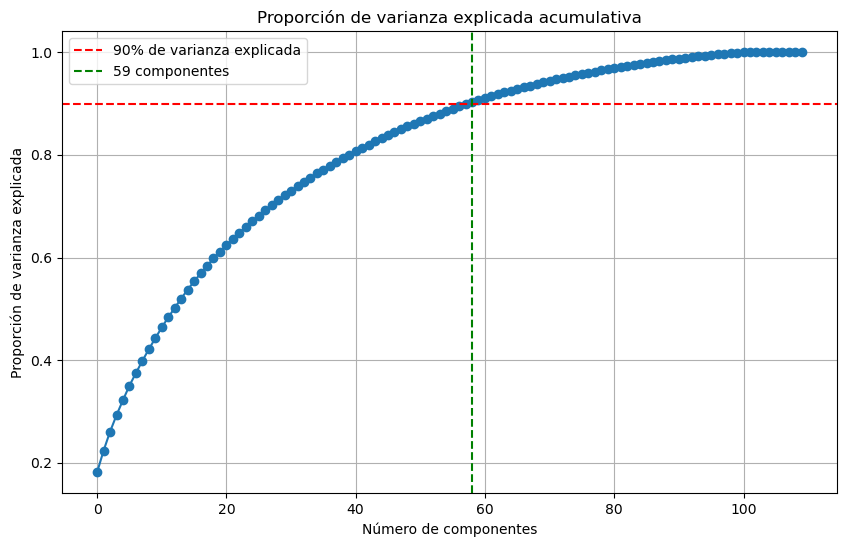

Número de componentes para el 90% de la varianza: 58


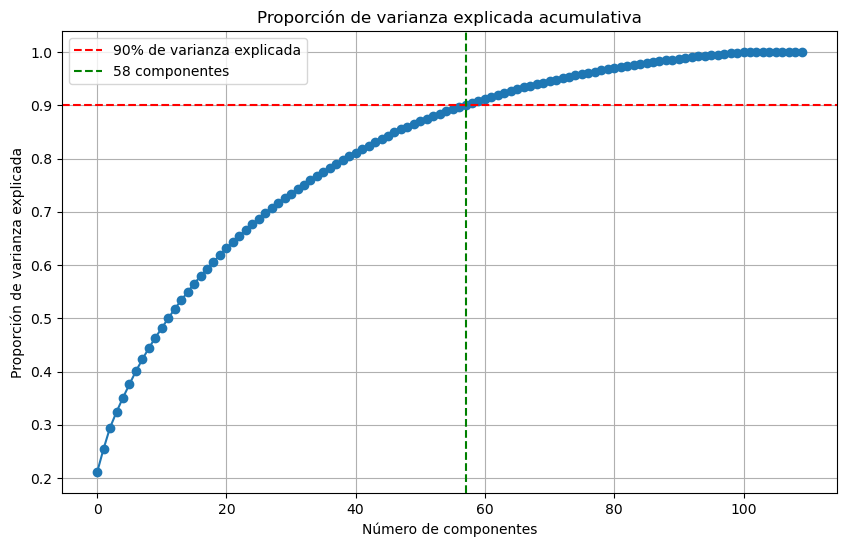

Número de componentes para el 90% de la varianza: 55


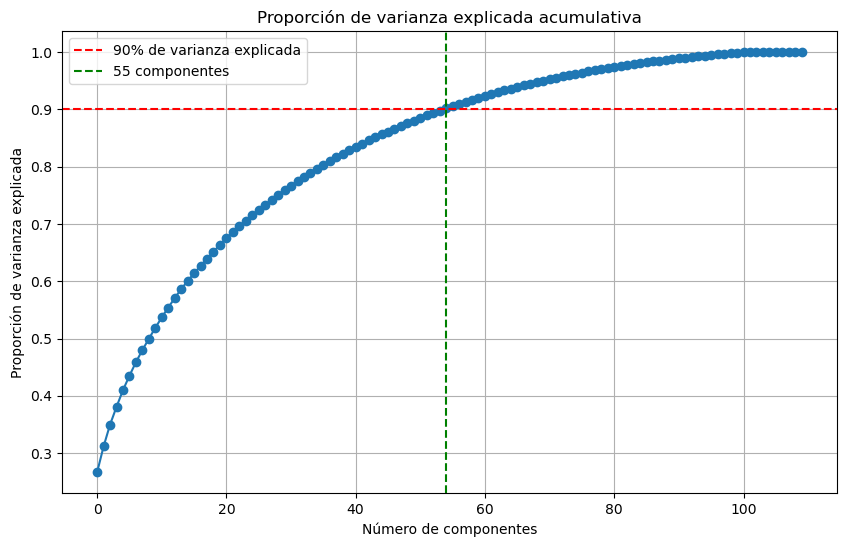

Número de componentes para el 90% de la varianza: 58


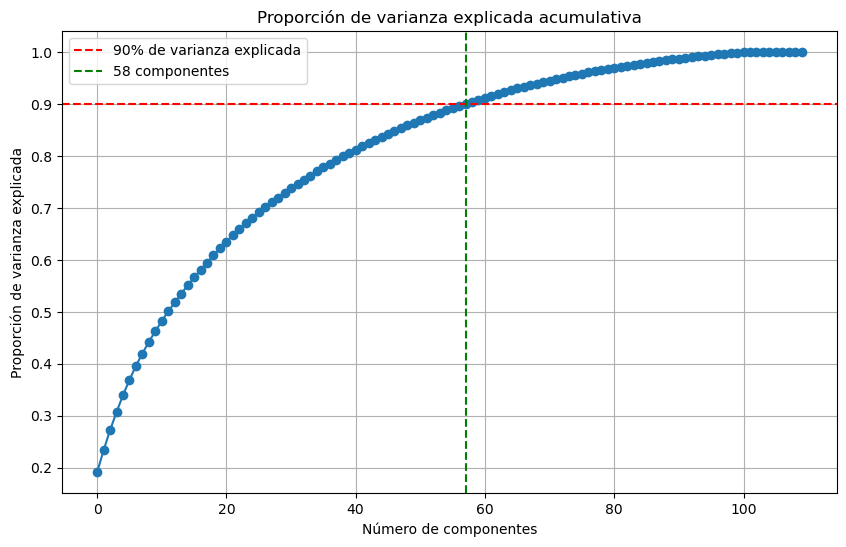

In [183]:
for i in range(20):

    pca = PCA()
    pca.fit(features_split[i])
    explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    n_components_90 = np.argmax(explained_variance_ratio >= 0.9) + 1
    print(f"Número de componentes para el 90% de la varianza: {n_components_90}")

    #Grafico
    plt.figure(figsize=(10, 6))
    plt.plot(explained_variance_ratio, marker="o")
    plt.axhline(y=0.9, color="r", linestyle="--", label="90% de varianza explicada")
    plt.axvline(x=n_components_90 - 1, color="g", linestyle="--", label=f"{n_components_90} componentes")
    plt.title("Proporción de varianza explicada acumulativa")
    plt.xlabel("Número de componentes")
    plt.ylabel("Proporción de varianza explicada")
    plt.legend()
    plt.grid()
    plt.show()


    pca = PCA(n_components=n_components_90)
    features_reduced = pca.fit_transform(features_split[i])

In [ ]:
print(len(track_ids))
print(len(features_reduced))
print(len(features_reduced[0]))
print(len(features_reduced[0][0]))

print(features_reduced[0].shape)

100
100
61
(61,)
